# Animate Simulation

This notebook is used to animate the simulation.

In [18]:
import numpy as np
import pandas as pd

In [2]:
from simulation import NetworkSimulation

from environment import Environment
from location import Location

from importlib import reload
from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from msci.utils.plot import plot_histogram_jn

## Setup the environment

The environement is an object which contains an area. The area is a list of lists.

### Get Real Data - shoppers & mac addresses

In [6]:
from msci.utils import utils

In [60]:
mac_address_df = utils.import_mac_addresses(version=3)
signal_df = utils.import_signals(version=4)

c:\users\tvb\envs\venv-msci\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [61]:
shopper_df = mac_address_df[mac_address_df.dbscan_label == 'Shopper']

In [112]:
from scipy.stats import gaussian_kde

In [144]:
length_of_stay_distribution = gaussian_kde((shopper_df.length_of_stay / 60).as_matrix())

In [126]:
shopper_df.start_time = pd.to_datetime(shopper_df.start_time)

c:\users\tvb\envs\venv-msci\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


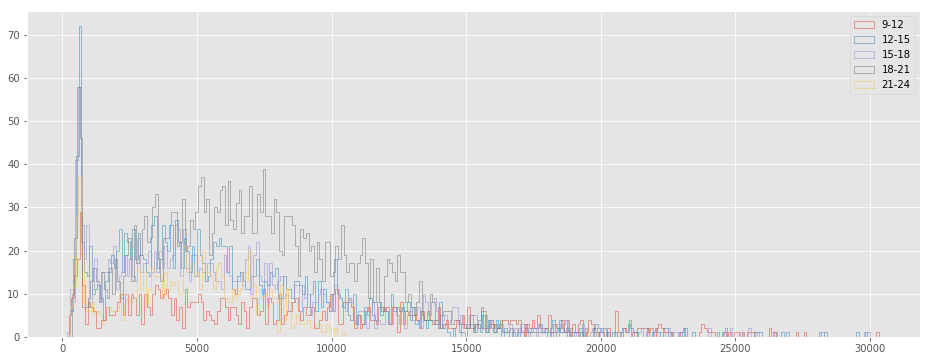

In [143]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))

binwidth = 100

data = shopper_df[
    (pd.datetime(2016, 12, 22, 9) < shopper_df.start_time) &
    (pd.datetime(2016, 12, 22, 12) > shopper_df.start_time)
].length_of_stay
ax.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth), histtype='step', label='9-12');

data = shopper_df[
    (pd.datetime(2016, 12, 22, 12) < shopper_df.start_time) &
    (pd.datetime(2016, 12, 22, 15) > shopper_df.start_time)
].length_of_stay
ax.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth), histtype='step', label='12-15');

data = shopper_df[
    (pd.datetime(2016, 12, 22, 15) < shopper_df.start_time) &
    (pd.datetime(2016, 12, 22, 18) > shopper_df.start_time)
].length_of_stay
ax.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth), histtype='step', label='15-18');

data = shopper_df[
    (pd.datetime(2016, 12, 22, 18) < shopper_df.start_time) &
    (pd.datetime(2016, 12, 22, 21) > shopper_df.start_time)
].length_of_stay
ax.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth), histtype='step', label='18-21');

data = shopper_df[
    (pd.datetime(2016, 12, 22, 21) < shopper_df.start_time) &
    (pd.datetime(2016, 12, 23, 0) > shopper_df.start_time)
].length_of_stay
ax.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth), histtype='step', label='21-24');

ax.legend();

### Create environment

In [9]:
shop_df = utils.import_shop_directory(mall='Mall of Mauritius', version=2)
shop_df.centroid = shop_df.centroid.apply(lambda x: x[1:-1].split(','))

In [74]:
environment_ = Environment(shop_df)

In [73]:
import copy

In [75]:
environment = copy.deepcopy(environment)

## Run the simulation

The simulation requires the maximum number of iterations (time) and the maximum number of shoppers (agents).

In [145]:
sim = NetworkSimulation(environment, max_shoppers=9000)
sim.length_of_stay_distribution = length_of_stay_distribution
sim.iterate(max_iterations=1000)
sim.create_signal_df()
sim.create_mac_address_df()

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

In [146]:
sim.total_minutes

900.0

## Probability distributions

c:\users\tvb\envs\venv-msci\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


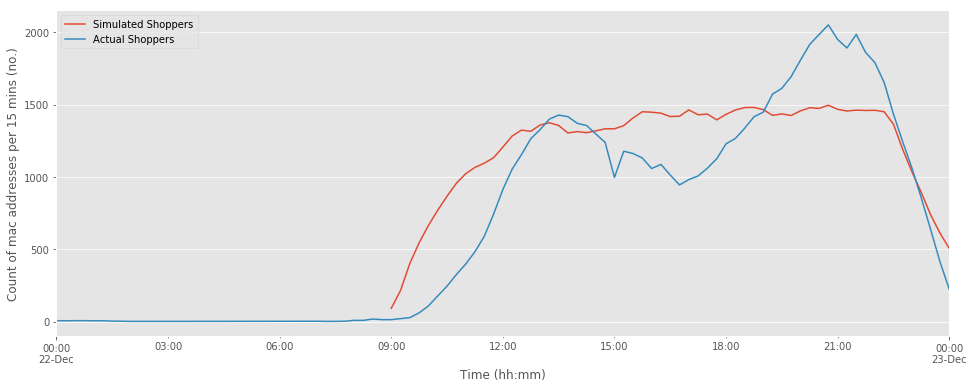

In [147]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))

plot_histogram_jn(
    sim.signal_df, 
    axes=ax,
    label='Simulated Shoppers',
);

plot_histogram_jn(
    signal_df[signal_df.mac_address.isin(shopper_df.mac_address)], 
    axes=ax,
    label='Actual Shoppers',
);

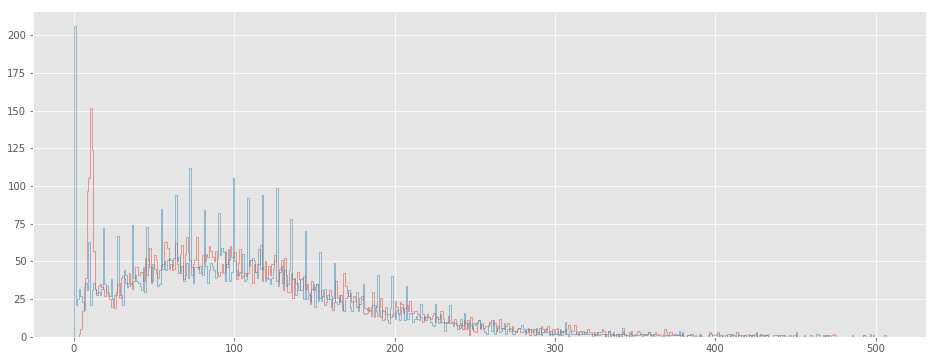

In [148]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))

binwidth = 1

data = (shopper_df.length_of_stay / 60).as_matrix()
ax.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth), histtype='step');

data = (sim.mac_address_df.length_of_stay / 60).as_matrix()
ax.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth), histtype='step');

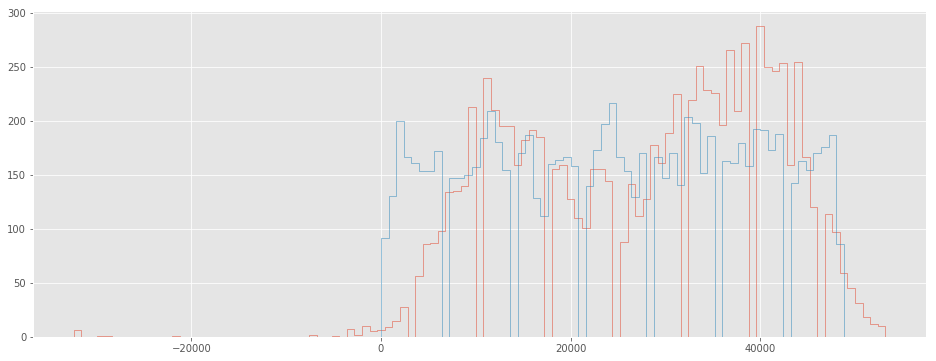

In [149]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))

binwidth = 800

start_time = min(pd.to_datetime(sim.mac_address_df.start_time))

data = (pd.to_datetime(shopper_df.start_time) - start_time).dt.round('15min').dt.total_seconds()
ax.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth), histtype='step');

data = (pd.to_datetime(sim.mac_address_df.start_time) - start_time).dt.round('15min').dt.total_seconds()
ax.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth), histtype='step');

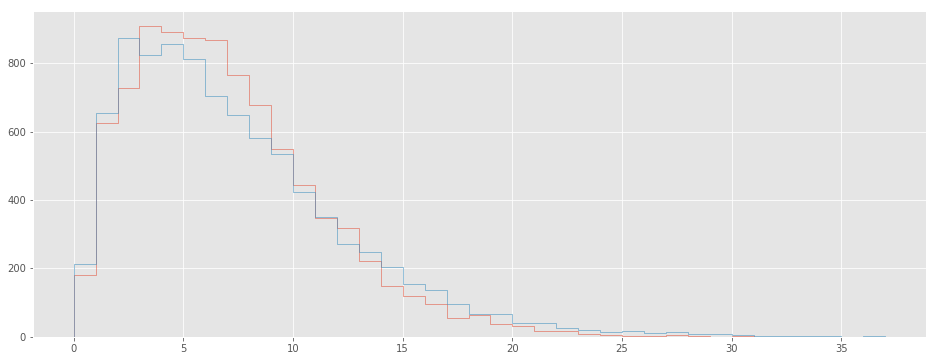

In [151]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))

binwidth = 1

data = sim.mac_address_df.number_of_shops.as_matrix()
ax.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth), histtype='step');

data = shopper_df.number_of_shops.as_matrix()
ax.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth), histtype='step');